In [71]:
import kagglehub
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
path = kagglehub.dataset_download("zynicide/wine-reviews")

winemag_130k = pd.read_csv(path + "/winemag-data-130k-v2.csv", index_col='Unnamed: 0')

with open(path + "/winemag-data-130k-v2.json") as f:
    winemag_from_json = json.load(f)

Using Colab cache for faster access to the 'wine-reviews' dataset.


# winemag_130k

In [72]:
print(winemag_130k.shape)
print(winemag_130k.columns)
winemag_130k.head()

(129971, 13)
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [73]:
l = len(winemag_130k)
columns = winemag_130k.columns

In [74]:
# 각 column의 Null 개수 확인
for column in columns:
    cnt_null = sum(winemag_130k[column].isnull())
    percentage = cnt_null / l
    print(f"null count of {column}: {cnt_null}, {percentage * 100:.2f}%")

null count of country: 63, 0.05%
null count of description: 0, 0.00%
null count of designation: 37465, 28.83%
null count of points: 0, 0.00%
null count of price: 8996, 6.92%
null count of province: 63, 0.05%
null count of region_1: 21247, 16.35%
null count of region_2: 79460, 61.14%
null count of taster_name: 26244, 20.19%
null count of taster_twitter_handle: 31213, 24.02%
null count of title: 0, 0.00%
null count of variety: 1, 0.00%
null count of winery: 0, 0.00%


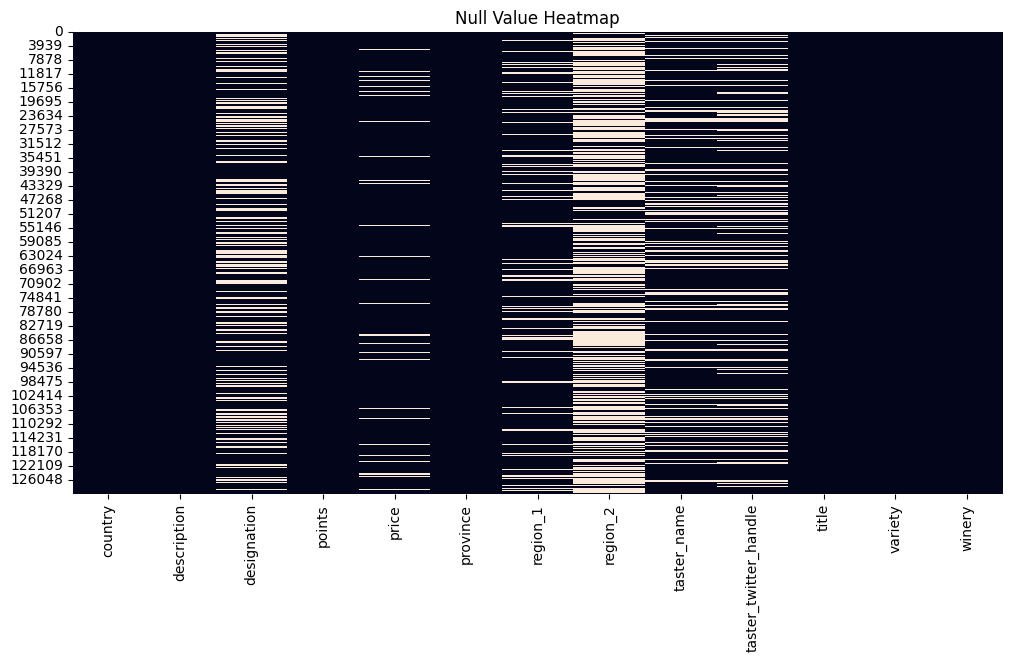

In [75]:
# Null heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(winemag_130k.isnull(), cbar=False)
plt.title("Null Value Heatmap")
plt.show()

In [76]:
# 필요 없는 column (taster_twitter_handle) drop
data = winemag_130k.drop("taster_twitter_handle", axis=1)
column = data.columns
print(data.shape)

(129971, 12)


# Price

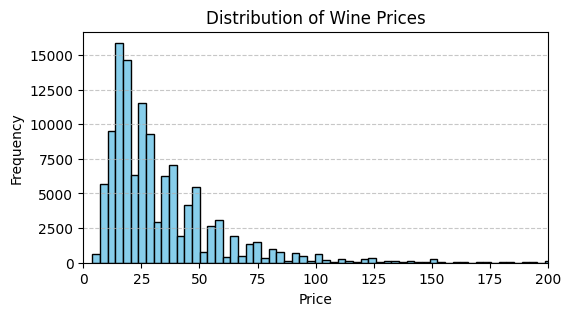

In [77]:
# price 분포 시각화
plt.figure(figsize=(6, 3))
plt.hist(data['price'].dropna(), bins=1_000, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

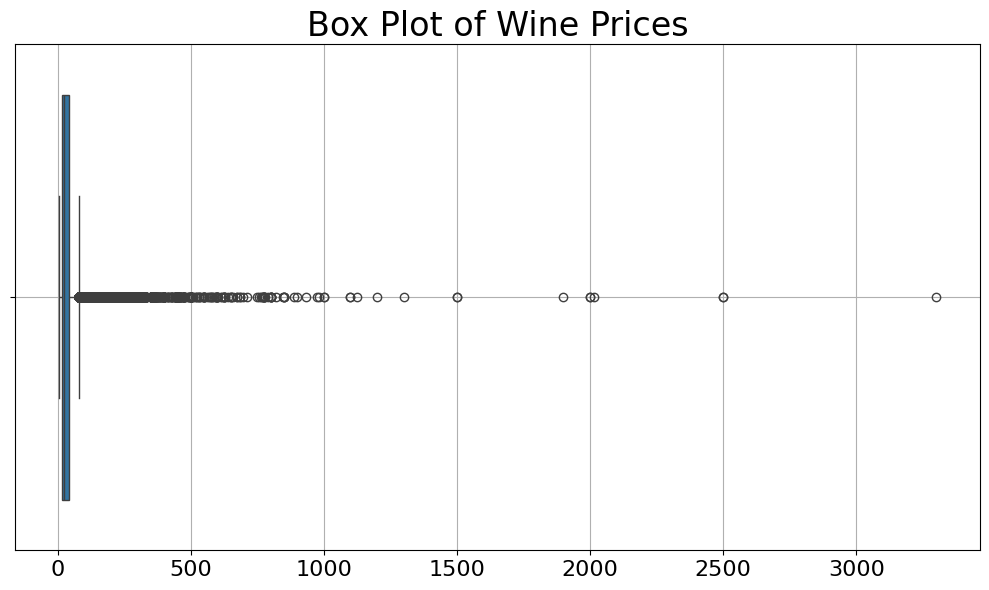

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'].dropna())
plt.title('Box Plot of Wine Prices', fontsize=24)
plt.xlabel("")
plt.xticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("prices_distribution.png")
plt.show()

In [79]:
percentile = data['price'].dropna().quantile(0.9999)

print(f"Price의 99.99% 이상이 분포하는 값의 최대치: {percentile}")

Price의 99.99% 이상이 분포하는 값의 최대치: 1100.0


In [80]:
# price 상한: 1000
data['price'] = data['price'].clip(upper=1000)

# Point

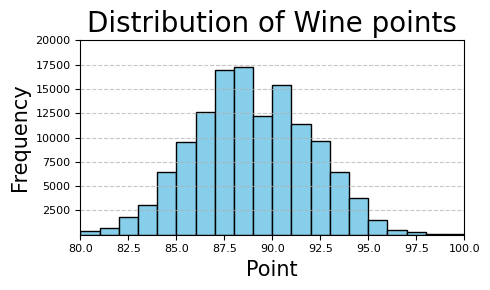

In [81]:
# point column 분석
plt.figure(figsize=(5, 3))
plt.hist(data['points'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine points', fontsize=20)
plt.xlabel("Point", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlim(80, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the origin tick labels

x_ticks = plt.xticks()[0]
y_ticks = plt.yticks()[0]
plt.xticks([t for t in x_ticks if t != 0], fontsize=8)
plt.yticks([t for t in y_ticks if t != 0], fontsize=8)
plt.tight_layout()
plt.savefig("points_distribution.png")

# Country

In [82]:
# 상위 N개 + others 묶어 시각화하는 함수
def topNPlusOthers(data, target, n):
    counts = data[target].value_counts()
    topN = counts.head(n)

    agg = pd.concat([
        topN,
        pd.Series({'Others': counts.iloc[n:].sum()})
    ])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=agg.index, y=agg.values, palette='muted')
    plt.title(f"Distribution of {target}", fontsize=20)
    plt.xlabel("")
    plt.ylabel("Count", fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"{target}_distribution.png")
    plt.show()

    return counts

In [83]:
# 모든 country 확인
unique_countries = data['country'].dropna().unique()
print(unique_countries)
print(f"\n총 나라 개수: {len(unique_countries)}")

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' 'Turkey' 'Czech Republic' 'Slovenia'
 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia'
 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia' 'Macedonia'
 'China' 'Egypt']

총 나라 개수: 43


/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


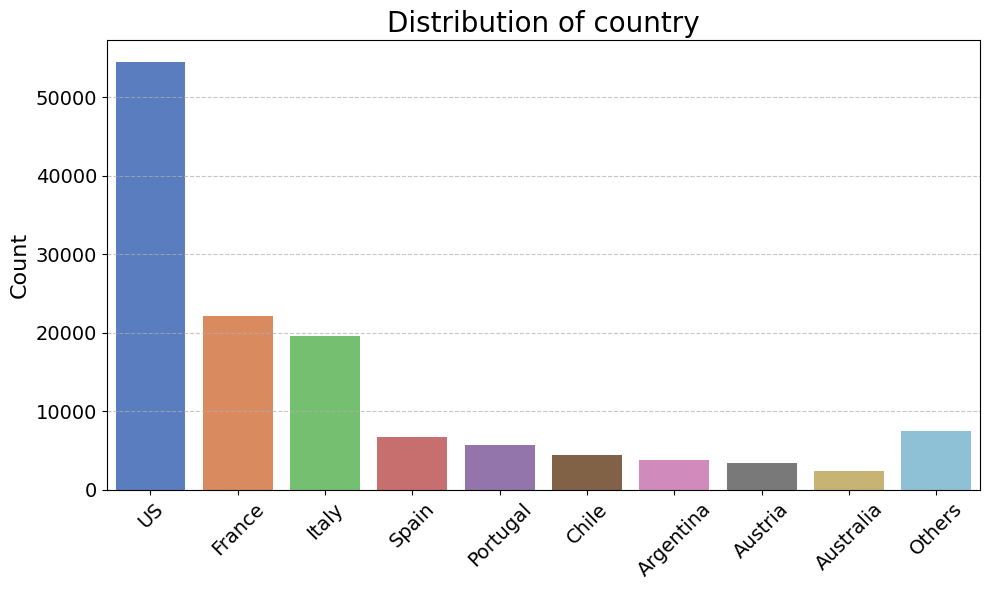

In [84]:
# 상위 9개 country + others 시각화
country_counts = topNPlusOthers(data, "country", 9)

# Winery

In [85]:
# 중복 winery 개수, 비율 확인
winery_counts = data['winery'].value_counts()
duplicate_wineries = winery_counts[winery_counts > 1].index.tolist()
top_10_wineries = winery_counts.head(10)
top_20_wineries = winery_counts.head(20)
print(top_10_wineries)
print(f"\n중복되는 winery의 총 개수: {len(duplicate_wineries)}")
print(f"중복되는 winery의 비율: {winery_counts[winery_counts > 1].sum()/l * 100: .5f}%")
print(f"상위 10개 winery의 비율: {top_10_wineries.sum()/l * 100: .5f}%")
print(f"상위 20개 winery의 비율: {top_20_wineries.sum()/l * 100: .5f}%")

winery
Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Kendall-Jackson          130
Name: count, dtype: int64

중복되는 winery의 총 개수: 12517
중복되는 winery의 비율:  96.73773%
상위 10개 winery의 비율:  1.46802%
상위 20개 winery의 비율:  2.36591%


/tmp/ipython-input-2694331065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


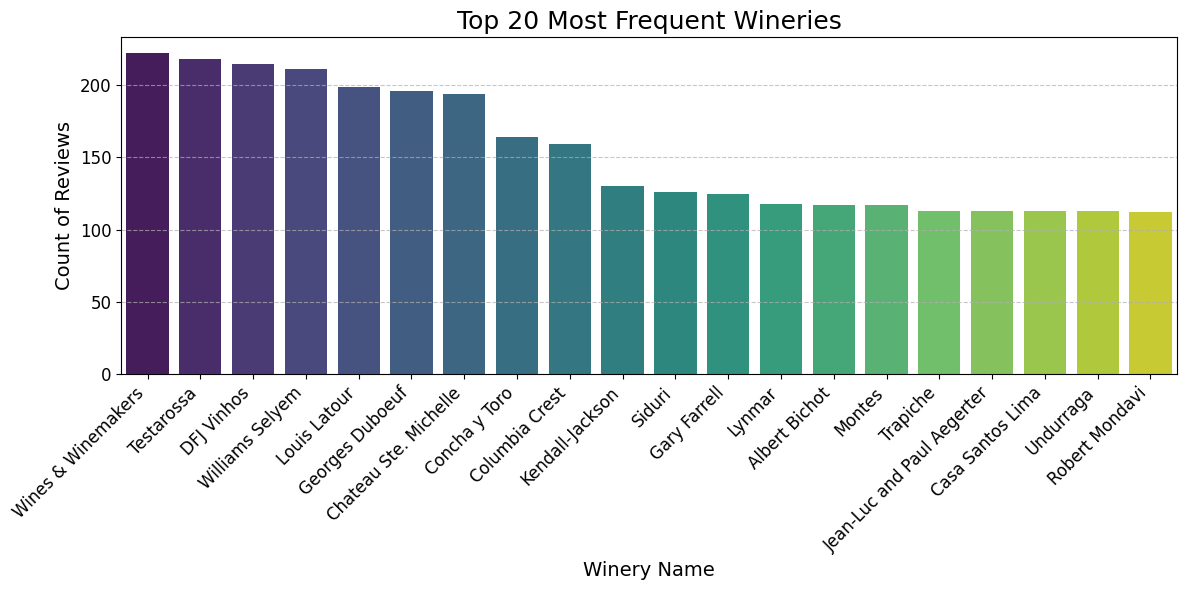

In [86]:
# 상위 20개 winery 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_wineries.index,
    y=top_20_wineries.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent Wineries", fontsize=18)
plt.xlabel("Winery Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


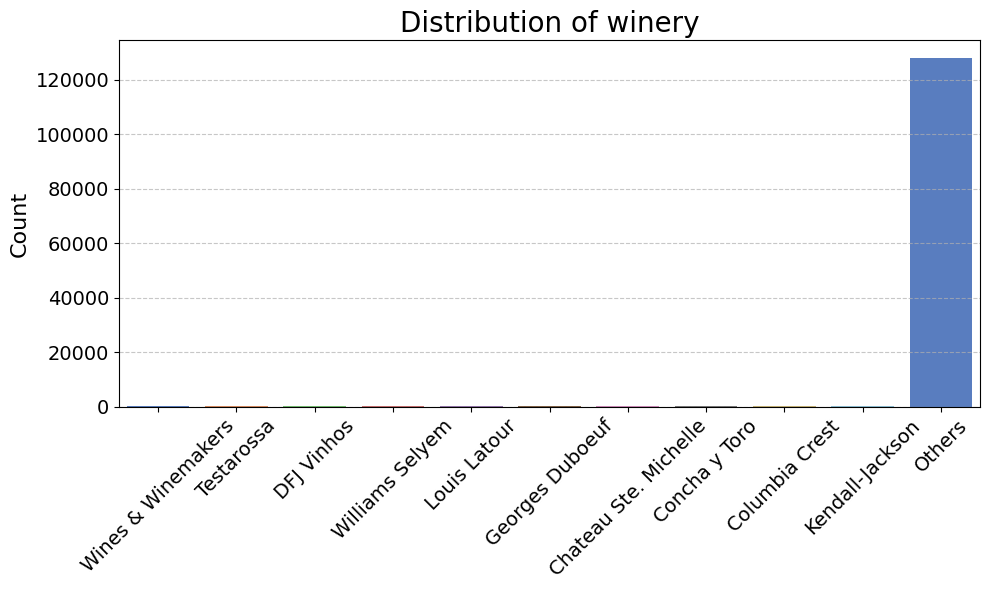

,count
winery,
Wines & Winemakers,222
Testarossa,218
DFJ Vinhos,215
Williams Selyem,211
Louis Latour,199
...,...
The Winemaker's Loft,1
Domaine Coteau,1
Château Jonc Blanc,1


In [87]:
# 상위 10개 winery + others 시각화
topNPlusOthers(data, "winery", 10)

# Province

In [88]:
# 중복 province 개수, 비율 확인
province_counts = data['province'].dropna().value_counts()
duplicate_provinces = province_counts[province_counts > 1].index.tolist()
top_10_provinces = province_counts.head(10)
top_20_provinces = province_counts.head(20)
n = len(data['province'].dropna())

print(top_10_provinces)
print(f"\n중복되는 province의 총 개수: {len(duplicate_provinces)}")
print(f"중복되는 province의 비율: {province_counts[province_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 province의 비율: {top_10_provinces.sum()/n * 100: .5f}%")
print(f"상위 20개 province의 비율: {top_20_provinces.sum()/n * 100: .5f}%")

province
California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: count, dtype: int64

중복되는 province의 총 개수: 371
중복되는 province의 비율:  99.95843%
상위 10개 province의 비율:  61.30261%
상위 20개 province의 비율:  75.21939%


/tmp/ipython-input-3259183556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


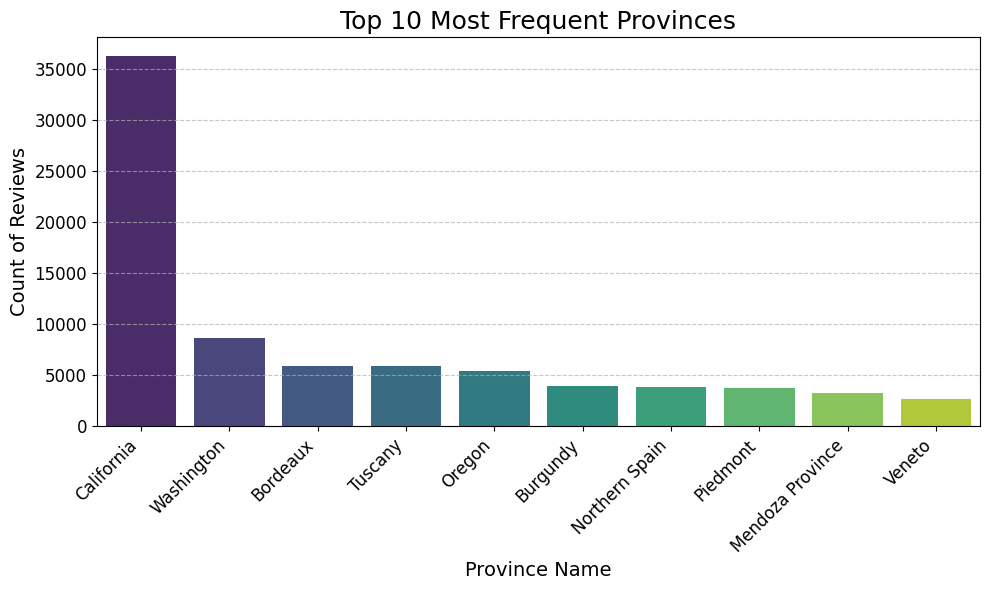

In [89]:
# 상위 10개 province 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_provinces.index,
    y=top_10_provinces.values,
    palette='viridis'
)

plt.title("Top 10 Most Frequent Provinces", fontsize=18)
plt.xlabel("Province Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


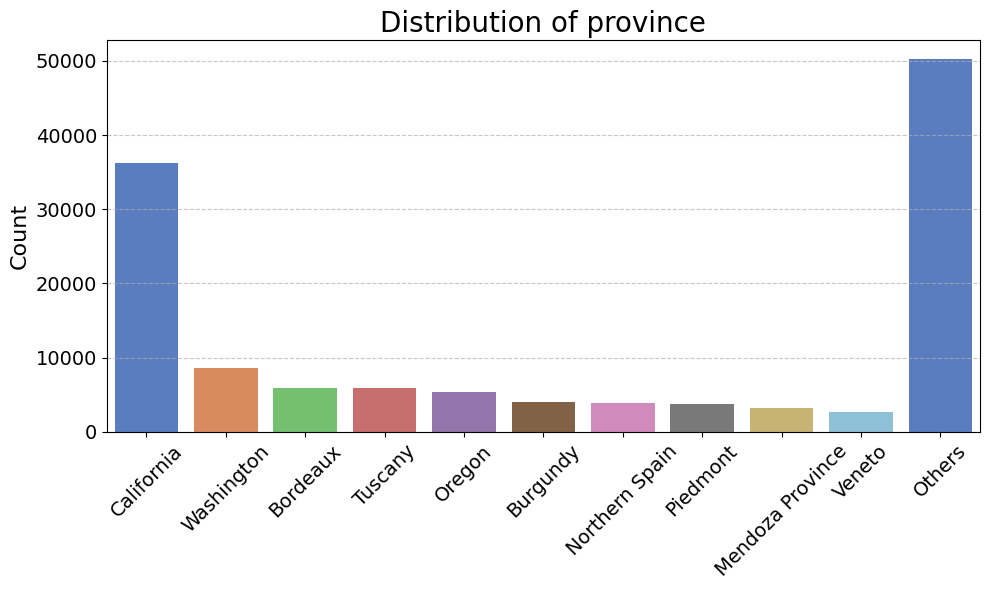

,count
province,
California,36247
Washington,8639
Bordeaux,5941
Tuscany,5897
Oregon,5373
...,...
Lesbos,1
Neuchâtel,1
Dealurile Hușilor,1


In [90]:
# 상위 10개 province + others 시각화
topNPlusOthers(data, "province", 10)

# Region_1

In [91]:
# 중복 region_1 개수, 비율 확인
region1_counts = data['region_1'].dropna().value_counts()
duplicate_region1 = region1_counts[region1_counts > 1].index.tolist()
top_10_region1 = region1_counts.head(10)
top_20_region1 = region1_counts.head(20)
n = len(data['region_1'].dropna())
print(top_10_region1)
print(f"\n중복되는 region_1의 총 개수: {len(duplicate_region1)}")
print(f"중복되는 region_1의 비율: {region1_counts[region1_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 region_1의 비율: {top_10_region1.sum()/n * 100: .5f}%")
print(f"상위 20개 region_1의 비율: {top_20_region1.sum()/n * 100: .5f}%")

region_1
Napa Valley             4480
Columbia Valley (WA)    4124
Russian River Valley    3091
California              2629
Paso Robles             2350
Mendoza                 2301
Willamette Valley       2301
Alsace                  2163
Champagne               1613
Barolo                  1599
Name: count, dtype: int64

중복되는 region_1의 총 개수: 1081
중복되는 region_1의 비율:  99.86388%
상위 10개 region_1의 비율:  24.51253%
상위 20개 region_1의 비율:  36.05368%


/tmp/ipython-input-2728371964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


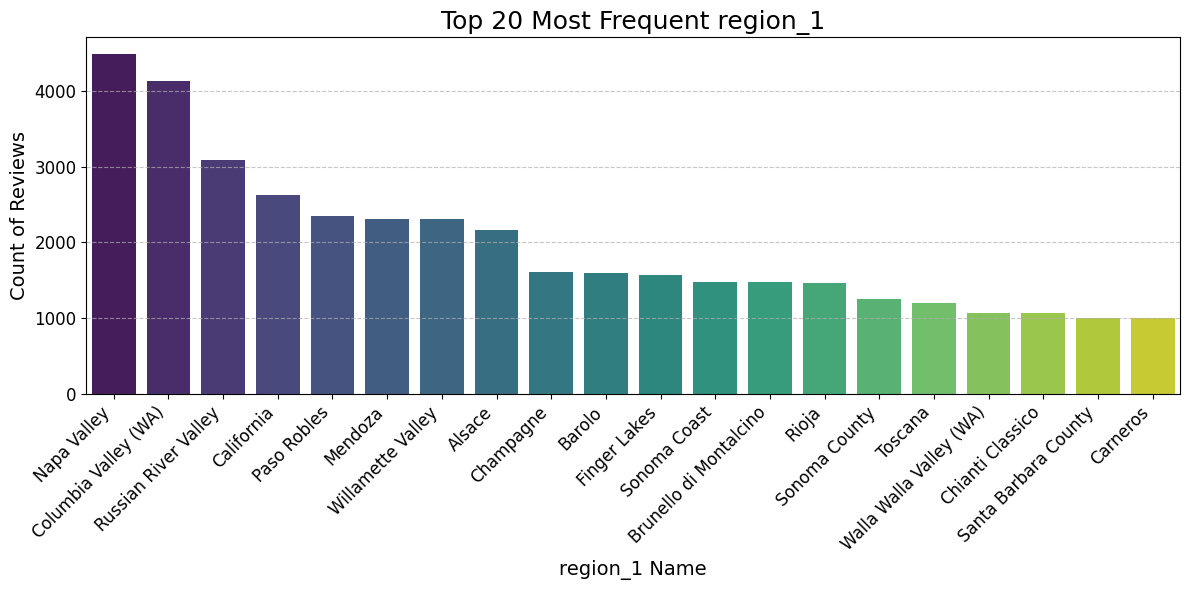

In [92]:
# 상위 20개 region_1 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_region1.index,
    y=top_20_region1.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent region_1", fontsize=18)
plt.xlabel("region_1 Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


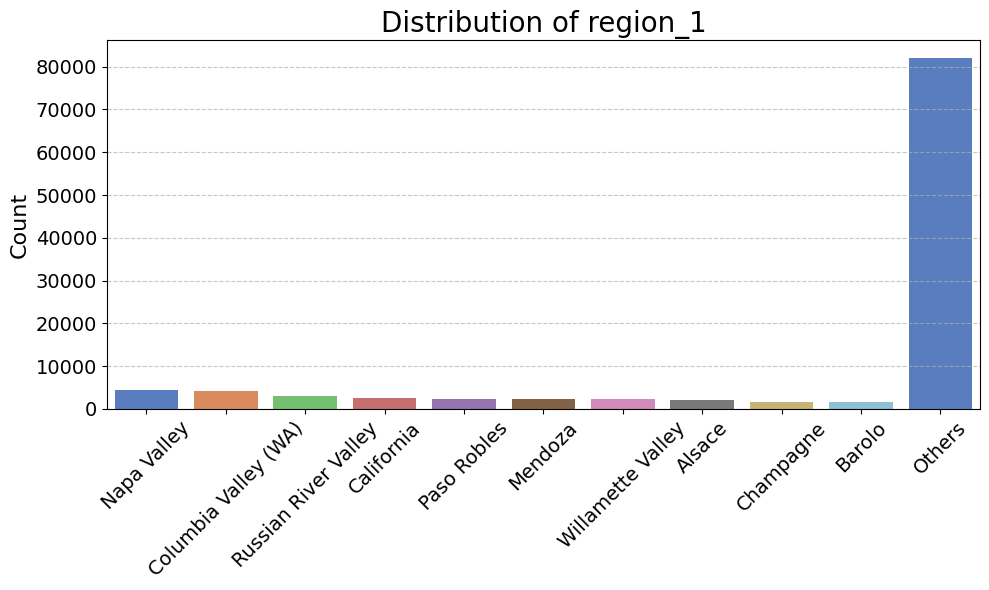

,count
region_1,
Napa Valley,4480
Columbia Valley (WA),4124
Russian River Valley,3091
California,2629
Paso Robles,2350
...,...
Sonoma-Santa Barbara-Mendocino,1
Nasco di Cagliari,1
Dolcetto d'Alba Superiore,1


In [93]:
# 상위 10개 province + others 시각화
topNPlusOthers(data, "region_1", 10)

# Region_2

In [94]:
# 중복 region_2 개수, 비율 확인
region2_counts = data['region_2'].dropna().value_counts()
duplicate_region2 = region2_counts[region2_counts > 1].index.tolist()
top_10_region2 = region2_counts.head(10)
n = len(data['region_2'].dropna())

print(top_10_region2)
print(f"\n중복되는 region_2의 총 개수: {len(duplicate_region2)}")
print(f"중복되는 region_2의 비율: {region2_counts[region2_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 region_2의 비율: {top_10_region2.sum()/n * 100: .5f}%")

region_2
Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Name: count, dtype: int64

중복되는 region_2의 총 개수: 17
중복되는 region_2의 비율:  100.00000%
상위 10개 region_2의 비율:  92.18982%


In [95]:
print(f"region_2 개수: {len(region2_counts)}")

region_2 개수: 17


/tmp/ipython-input-4240016011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


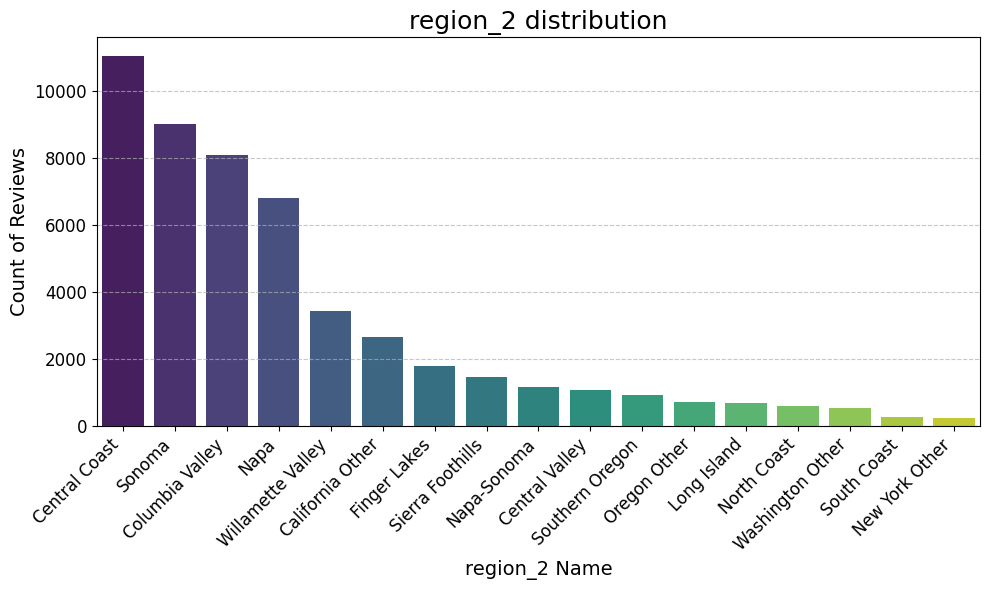

In [96]:
# region_2 시각화
region2 = region2_counts.head(17)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=region2.index,
    y=region2.values,
    palette='viridis'
)

plt.title("region_2 distribution", fontsize=18)
plt.xlabel("region_2 Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Taster_name

In [97]:
# 중복 taster 개수, 비율 확인
taster_counts = data['taster_name'].dropna().value_counts()
duplicate_taster = taster_counts[taster_counts > 1].index.tolist()
top_10_taster = taster_counts.head(10)
n = len(data['taster_name'].dropna())

print(top_10_taster)
print(f"\n중복되는 taster의 총 개수: {len(duplicate_taster)}")
print(f"중복되는 tastser의 비율: {taster_counts[taster_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 tastser의 비율: {top_10_taster.sum()/n * 100: .5f}%")

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: count, dtype: int64

중복되는 taster의 총 개수: 19
중복되는 tastser의 비율:  100.00000%
상위 10개 tastser의 비율:  92.09753%


In [98]:
print(f"taster_name 개수: {len(taster_counts)}")

taster_name 개수: 19


/tmp/ipython-input-3235941972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


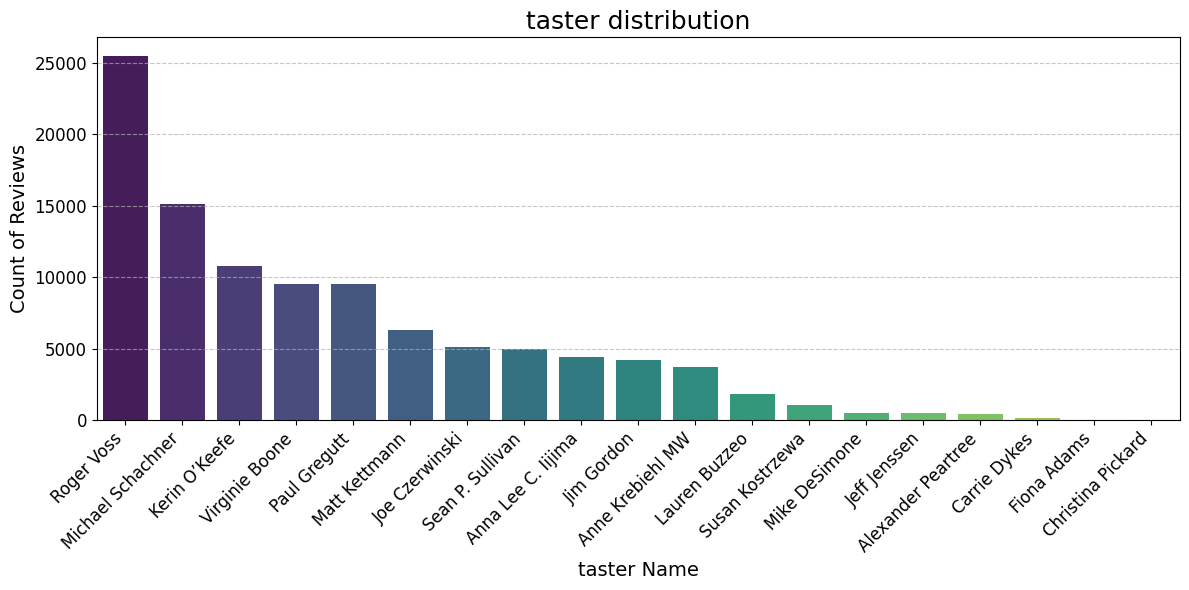

In [99]:
# taster 시각화
plt.figure(figsize=(12, 6))
all_taster = taster_counts.head(19)
sns.barplot(
    x=all_taster.index,
    y=all_taster.values,
    palette='viridis'
)

plt.title("taster distribution", fontsize=18)
plt.xlabel("taster Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


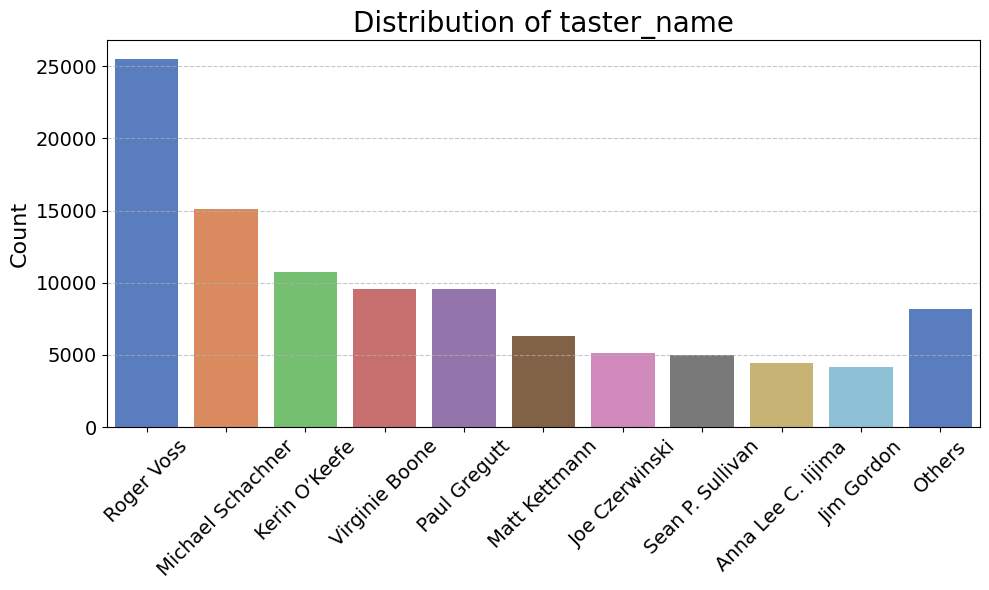

,count
taster_name,
Roger Voss,25514
Michael Schachner,15134
Kerin O’Keefe,10776
Virginie Boone,9537
Paul Gregutt,9532
Matt Kettmann,6332
Joe Czerwinski,5147
Sean P. Sullivan,4966
Anna Lee C. Iijima,4415


In [100]:
# 상위 10개 taster + others 시각화
topNPlusOthers(data, "taster_name", 10)

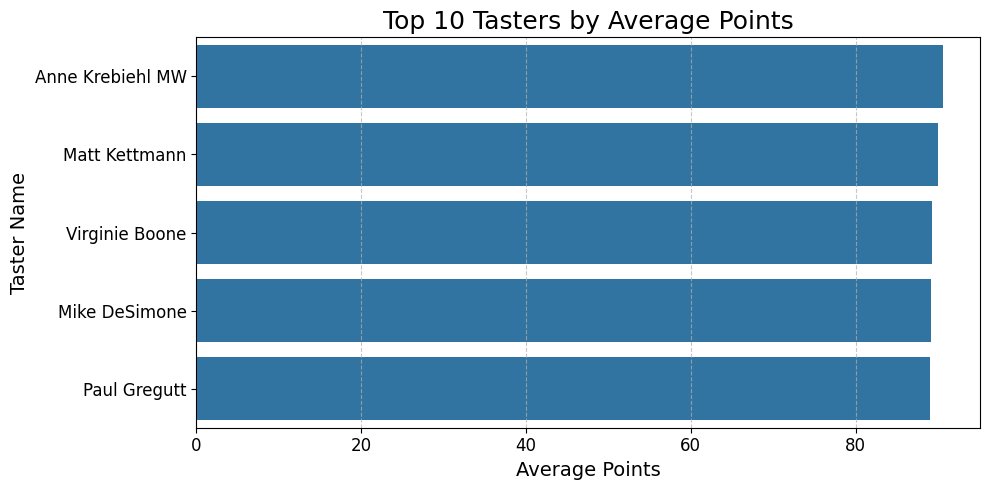

In [101]:
# Point를 후하게 준 상위 5명 시각화
taster_point_average = data.groupby('taster_name')['points'].mean().sort_values(ascending=False)
top_5_tasters_avg = taster_point_average.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_5_tasters_avg.values,
    y=top_5_tasters_avg.index
)
plt.title('Top 10 Tasters by Average Points', fontsize=18)
plt.xlabel('Average Points', fontsize=14)
plt.ylabel('Taster Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

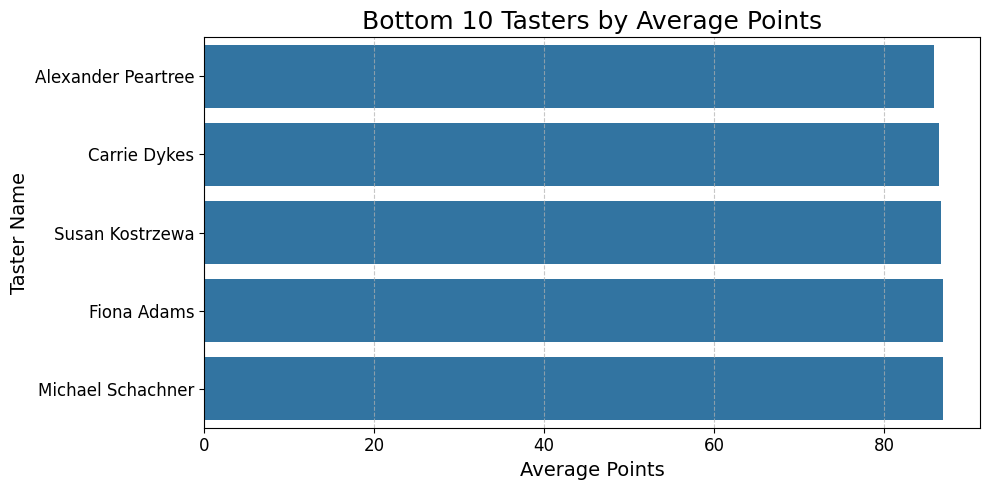

In [102]:
# Point를 박하게 준 상위 5명 시각화
taster_point_average = data.groupby('taster_name')['points'].mean().sort_values(ascending=True)
bot_5_tasters_avg = taster_point_average.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=bot_5_tasters_avg.values,
    y=bot_5_tasters_avg.index
)
plt.title('Bottom 10 Tasters by Average Points', fontsize=18)
plt.xlabel('Average Points', fontsize=14)
plt.ylabel('Taster Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Designation

In [103]:
# 중복 designation 개수, 비율 확인
designation_counts = data['designation'].dropna().value_counts()
duplicate_designation = designation_counts[designation_counts > 1].index.tolist()
top_10_designation = designation_counts.head(10)
top_20_designation = designation_counts.head(20)
n = len(data['designation'].dropna())

print(top_10_designation)
print(f"\n중복되는 designation의 총 개수: {len(duplicate_designation)}")
print(f"중복되는 designation의 비율: {designation_counts[designation_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 designation의 비율: {top_10_designation.sum()/n * 100: .5f}%")
print(f"상위 20개 designation의 비율: {top_20_designation.sum()/n * 100: .5f}%")

designation
Reserve           2009
Estate            1322
Reserva           1259
Riserva            698
Estate Grown       621
Brut               513
Dry                413
Barrel sample      375
Crianza            343
Estate Bottled     342
Name: count, dtype: int64

중복되는 designation의 총 개수: 15136
중복되는 designation의 비율:  75.30647%
상위 10개 designation의 비율:  8.53458%
상위 20개 designation의 비율:  10.96794%


/tmp/ipython-input-4064009081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


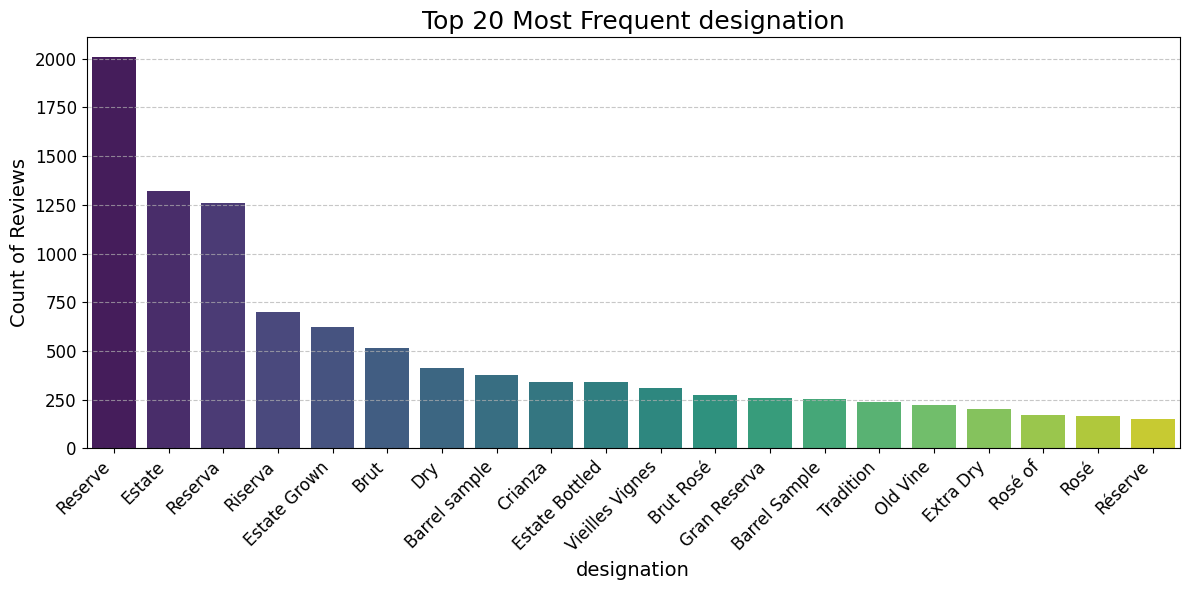

In [104]:
# 상위 20개 taster 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_designation.index,
    y=top_20_designation.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent designation", fontsize=18)
plt.xlabel("designation", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


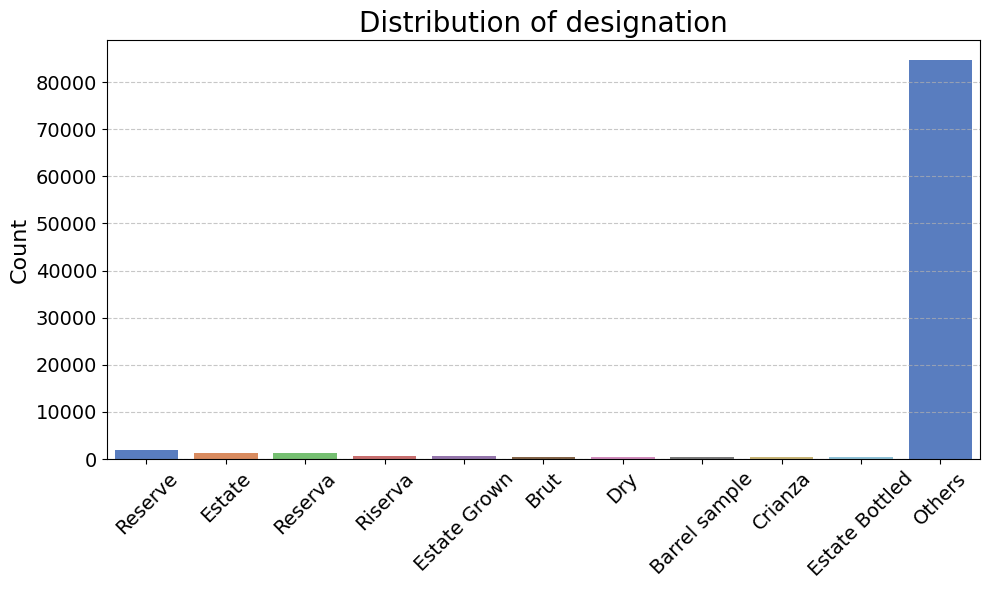

,count
designation,
Reserve,2009
Estate,1322
Reserva,1259
Riserva,698
Estate Grown,621
...,...
Corte Menini,1
La Belle de Mai,1
One Doña Angeles Vineyard,1


In [105]:
# 상위 10개 designation + others 시각화
topNPlusOthers(data, "designation", 10)

# Title

In [106]:
# 중복 title 개수, 비율 확인
title_counts = data['title'].dropna().value_counts()
duplicate_title = title_counts[title_counts > 1].index.tolist()
top_10_title = title_counts.head(10)
top_20_title = title_counts.head(20)
n = len(data['title'].dropna())

print(top_10_title)
print(f"\n중복되는 title의 총 개수: {len(duplicate_title)}")
print(f"중복되는 title의 비율: {title_counts[title_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 title의 비율: {top_10_title.sum()/n * 100: .5f}%")
print(f"상위 20개 title의 비율: {top_20_title.sum()/n * 100: .5f}%")

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                11
Korbel NV Brut Sparkling (California)                                  9
Segura Viudas NV Extra Dry Sparkling (Cava)                            8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                   7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                7
Ruinart NV Brut Rosé  (Champagne)                                      7
Mumm Napa NV Brut Prestige Sparkling (Napa Valley)                     6
Boizel NV Brut Réserve  (Champagne)                                    6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)     6
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)              6
Name: count, dtype: int64

중복되는 title의 총 개수: 10736
중복되는 title의 비율:  16.82452%
상위 10개 title의 비율:  0.05617%
상위 20개 title의 비율:  0.09694%


In [107]:
# title 중복 그룹 내 price의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_price(group):
    return group['price'].dropna().nunique() > 1

# title 중복 그룹 내 country의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_country(group):
    return group['country'].dropna().nunique() > 1

# title 중복 그룹 내 winery의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_winery(group):
    return group['winery'].dropna().nunique() > 1

# title 중복 그룹 내 province의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_province(group):
    return group['province'].dropna().nunique() > 1

# title 중복 그룹 내 designation의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_designation(group):
    return group['designation'].dropna().nunique() > 1

In [108]:
# title 같지만 price 다른 레코드 확인
data_dpc_title = data[data['title'].isin(duplicate_title)].copy()
different_price_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_price)
)
num_records = len(different_price_same_title_data)
num_unique_titles = different_price_same_title_data['title'].nunique()

print(f"Title은 같지만 Price는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Price는 다른 레코드 총 개수: 1204개
해당 조건을 만족하는 고유 Title 개수: 473개


In [109]:
# title 같지만 country 다른 레코드 확인
different_country_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_country)
)
num_records = len(different_country_same_title_data)
num_unique_titles = different_country_same_title_data['title'].nunique()

print(f"Title은 같지만 Country는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Country는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [110]:
# title 같지만 winery 다른 레코드 확인
different_winery_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_winery)
)
num_records = len(different_winery_same_title_data)
num_unique_titles = different_winery_same_title_data['title'].nunique()

print(f"Title은 같지만 Winery는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Winery는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [111]:
# title 같지만 province 다른 레코드 확인
different_province_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_province)
)
num_records = len(different_province_same_title_data)
num_unique_titles = different_province_same_title_data['title'].nunique()

print(f"Title은 같지만 Province는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Province는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [112]:
# title 같지만 designation 다른 레코드 확인
different_designation_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_designation)
)
num_records = len(different_designation_same_title_data)
num_unique_titles = different_designation_same_title_data['title'].nunique()

print(f"Title은 같지만 Designation는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Designation는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


/tmp/ipython-input-899855457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


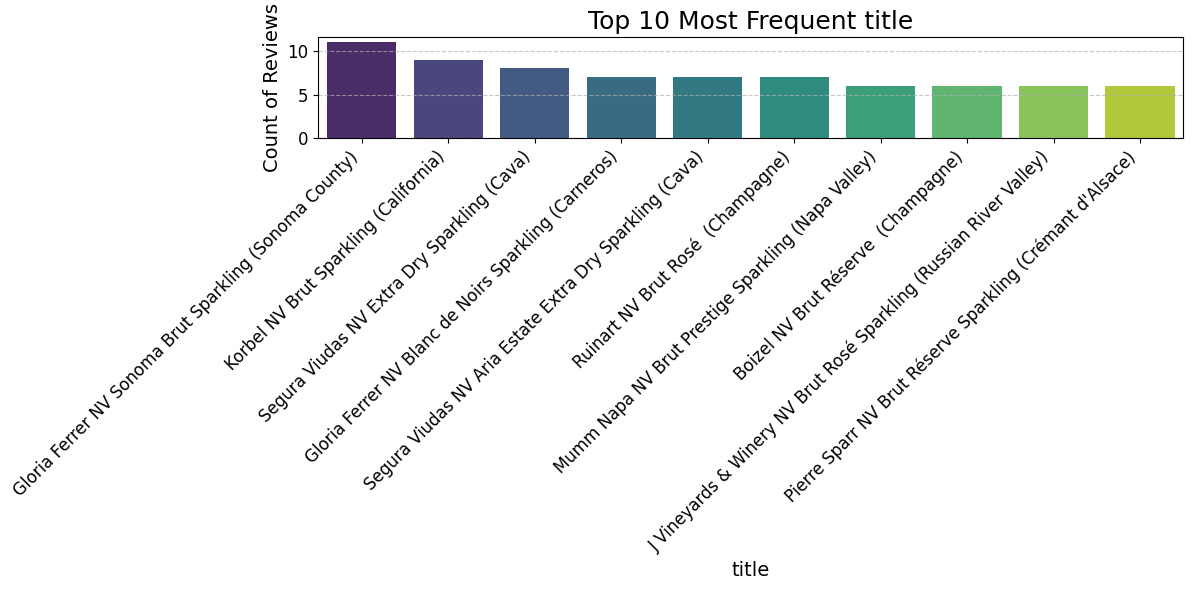

In [113]:
# 상위 10개 Title 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_title.index,
    y=top_10_title.values,
    palette='viridis'
)

plt.title("Top 10 Most Frequent title", fontsize=18)
plt.xlabel("title", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Variety

In [114]:
# 중복 variety 개수, 비율 확인
variety_counts = data['variety'].dropna().value_counts()
duplicate_variety = variety_counts[variety_counts > 1].index.tolist()
top_10_variety = variety_counts.head(10)
top_20_variety = variety_counts.head(20)
n = len(data['variety'].dropna())

print(top_10_variety)
print(f"\n중복되는 variety의 총 개수: {len(duplicate_variety)}")
print(f"중복되는 variety의 비율: {variety_counts[variety_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 variety의 비율: {top_10_variety.sum()/n * 100: .5f}%")
print(f"상위 20개 variety의 비율: {top_20_variety.sum()/n * 100: .5f}%")

variety
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: count, dtype: int64

중복되는 variety의 총 개수: 567
중복되는 variety의 비율:  99.89228%
상위 10개 variety의 비율:  54.87574%
상위 20개 variety의 비율:  72.25821%


/tmp/ipython-input-404764955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


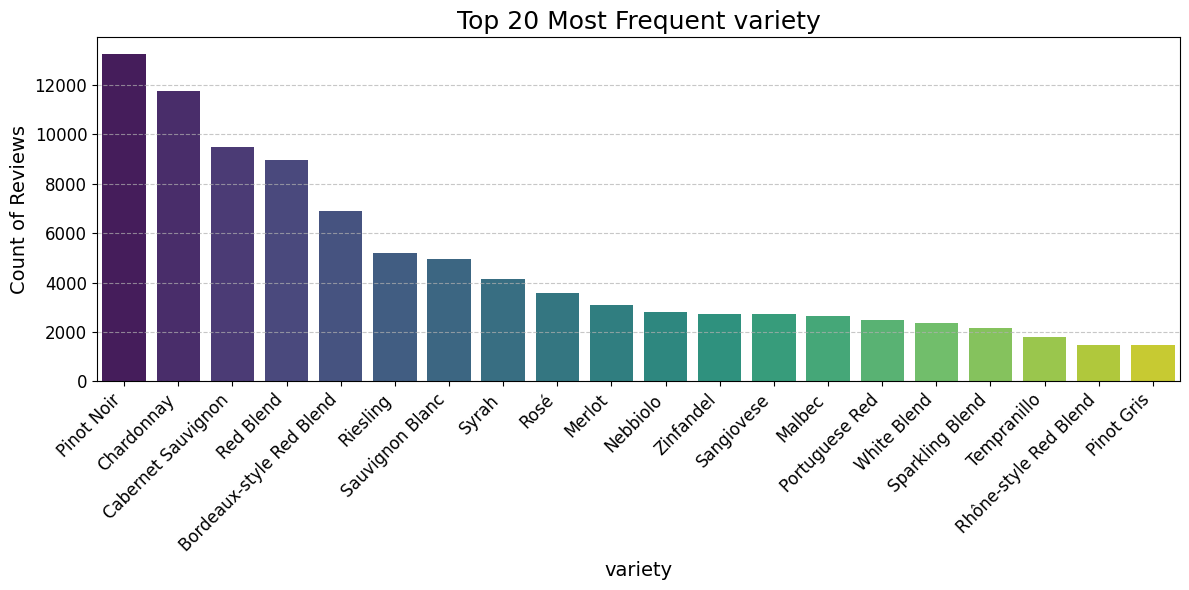

In [115]:
# 상위 20개 variety 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_variety.index,
    y=top_20_variety.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent variety", fontsize=18)
plt.xlabel("variety", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3336957138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


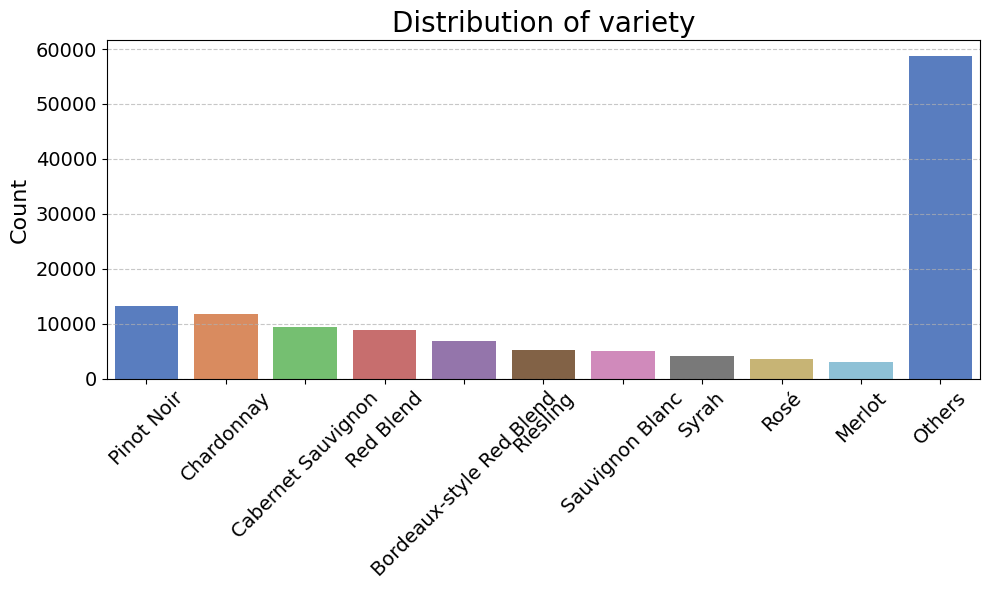

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Picapoll,1
Blauburger,1
Tinta Madeira,1


In [116]:
# 상위 10개 variety + others 시각화
topNPlusOthers(data, "variety", 10)

# Description

In [117]:
# 중복 variety 개수, 비율 확인
description_counts = data['description'].dropna().value_counts()
duplicate_description = description_counts[description_counts > 1].index.tolist()
top_10_description = description_counts.head(10)
top_20_description = description_counts.head(20)
n = len(data['description'].dropna())

print(f"\n중복되는 description의 총 개수: {len(duplicate_description)}")
print(f"중복되는 description의 비율: {description_counts[description_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 description의 비율: {top_10_description.sum()/n * 100: .5f}%")
print(f"상위 20개 description의 비율: {top_20_description.sum()/n * 100: .5f}%")


중복되는 description의 총 개수: 10010
중복되는 description의 비율:  15.40805%
상위 10개 description의 비율:  0.02000%
상위 20개 description의 비율:  0.03539%


In [118]:
# 중복 상위 5개 description과 중복 횟수
print(description_counts.head(5))

description
Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.                                         3
Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.    3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                          3
Ripe plum, game, truffle, leather and menthol are some of the aroma

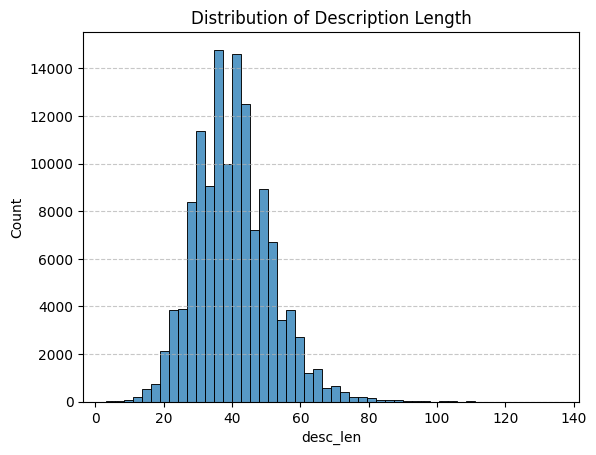

In [119]:
# description 텍스트 길이 분포 시각화
data["desc_len"] = data["description"].apply(lambda x: len(str(x).split()))
sns.histplot(data["desc_len"], bins=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribution of Description Length")

plt.show()

# Pseudo_queries

In [120]:
# queries 확인
url = "https://raw.githubusercontent.com/3sirn3203/20252R0136COSE36203/main/data/pseudo_queries.csv"
df = pd.read_csv(url)
df.head(20)

,row_id,pseudo_query
0,0,"Sicilian white wine, dry, fruity, under $30"
1,1,cheap fruity Portuguese red wine for everyday ...
2,2,crisp Pinot Gris from Oregon with lime flavor
3,3,sweet Riesling Michigan with tropical fruit fl...
4,4,"rustic Pinot Noir for winter stew, Willamette ..."
5,5,Spanish red wine with plum and herbal notes
6,6,light and fruity red wine from Sicily
7,7,dry and spicy Gewürztraminer for food pairing
8,8,German Gewürztraminer fruity and off-dry under...
9,9,crisp Pinot Gris from Alsace with apple and pear


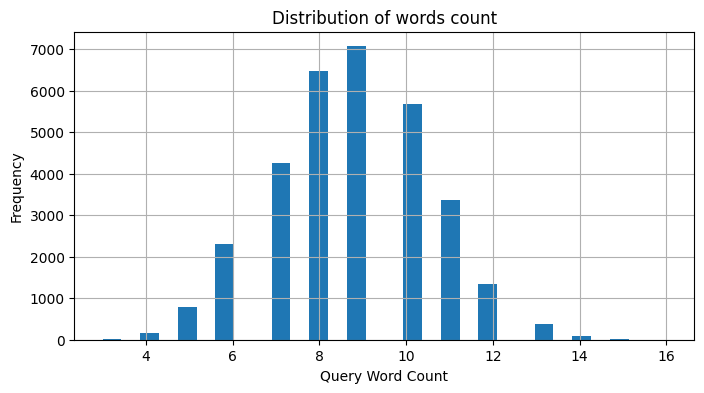

In [121]:
# 단어 수 분포 시각화
df['query_word_count'] = df['pseudo_query'].apply(lambda x: len(str(x).split()))
df['query_word_count'].describe()
plt.figure(figsize=(8,4))
df['query_word_count'].hist(bins=30)
plt.title("Distribution of words count")
plt.xlabel("Query Word Count")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-892450137.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


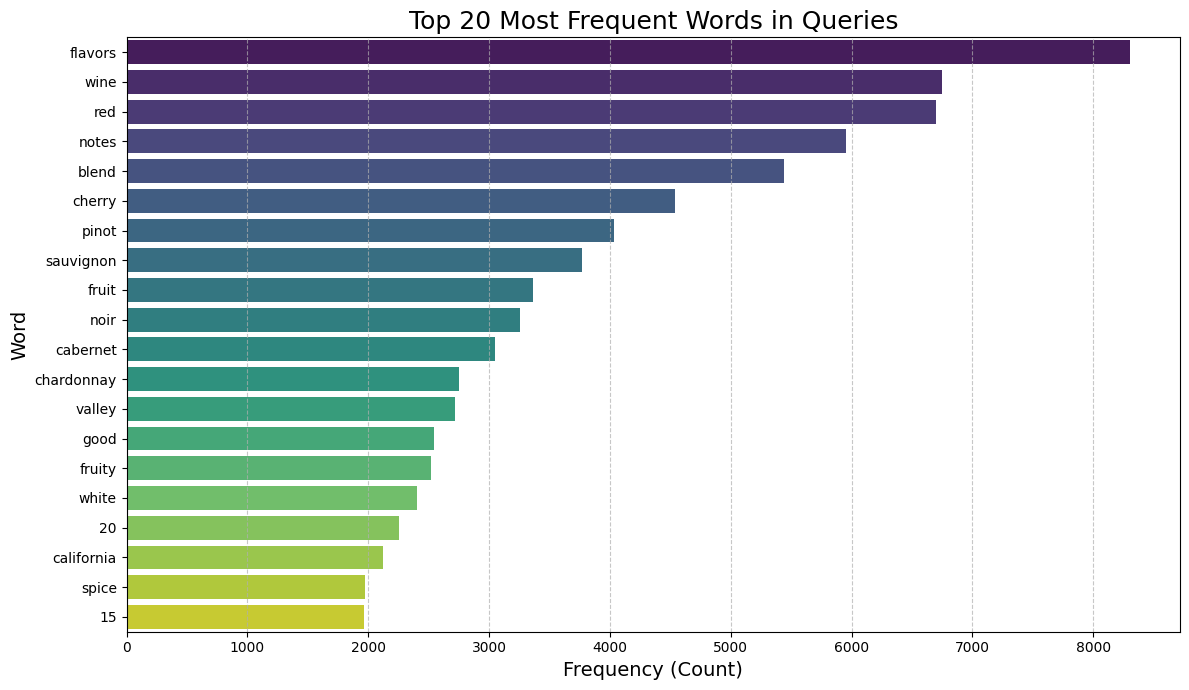

In [122]:
# 자주 쓰인 상위 20개 단어 시각화
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

def get_word_counts(df, column_name, top_n=20):
    stop_words = set(stopwords.words('english'))    # 영어 불용어 설정
    all_text = ' '.join(df[column_name].dropna().str.lower().tolist())
    words = re.findall(r'\b\w+\b', all_text)    # 텍스트에서 단어만 추출
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]    # 불용어 제거 및 한 글자 단어 제거

    word_counts = Counter(filtered_words)
    top_words = pd.Series(dict(word_counts.most_common(top_n)))
    return top_words

top_20_words = get_word_counts(df, 'pseudo_query', top_n=20)

plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_20_words.values,
    y=top_20_words.index,
    palette='viridis'
)

plt.title('Top 20 Most Frequent Words in Queries', fontsize=18)
plt.xlabel('Frequency (Count)', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()